# Ordinary Least Squares (OLS) – From Scratch

In this notebook, we implement **Linear Regression using Ordinary Least Squares (OLS)**
from scratch using matrix operations.

No machine learning libraries are used.
Only linear algebra.

## Goals

- Understand the mathematical formulation of OLS
- Implement linear regression using matrices
- Connect OLS to multiple linear regression
- Observe the effect of multicollinearity

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We use the same student performance dataset used in previous notebooks.

In [7]:
df = pd.read_csv("datasets/students_scores.csv")
df

,study_hours,attendance_rate,previous_gpa,final_score
0,5,70,14.0,13.0
1,6,75,14.5,14.0
2,7,80,15.0,15.0
3,8,85,15.5,16.0
4,9,90,16.0,17.0
5,10,95,16.5,18.0
6,11,96,17.0,18.5
7,12,98,17.5,19.0
8,13,99,18.0,19.5
9,14,100,18.5,20.0


We select input features and the target variable.

In [8]:
X = df[["study_hours", "attendance_rate"]].values
y = df["final_score"].values

OLS requires adding a column of ones to the feature matrix
to represent the intercept term.

In [9]:
X_design = np.c_[np.ones(X.shape[0]), X]
X_design

array([[  1.,   5.,  70.],
       [  1.,   6.,  75.],
       [  1.,   7.,  80.],
       [  1.,   8.,  85.],
       [  1.,   9.,  90.],
       [  1.,  10.,  95.],
       [  1.,  11.,  96.],
       [  1.,  12.,  98.],
       [  1.,  13.,  99.],
       [  1.,  14., 100.]])

The closed-form solution of OLS is:

θ = (XᵀX)⁻¹ Xᵀ y

Where:
- X is the design matrix
- y is the target vector
- θ contains the intercept and coefficients

In [10]:
XTX = X_design.T @ X_design
XTX_inv = np.linalg.inv(XTX)
XTy = X_design.T @ y

theta = XTX_inv @ XTy
theta

array([1.95109533, 0.32628787, 0.13456272])

The vector θ contains:
- θ₀ : intercept
- θ₁, θ₂, θ₃ : coefficients of the features

In [11]:
intercept = theta[0]
coefficients = theta[1:]

intercept, coefficients

(np.float64(1.951095327744698), array([0.32628787, 0.13456272]))

We now use the learned parameters to make predictions.

In [12]:
y_pred = X_design @ theta

We evaluate the model using Mean Squared Error (MSE).

In [13]:
mse = np.mean((y - y_pred) ** 2)
mse

np.float64(0.0005455245593017123)

We compare actual and predicted values.

In [14]:
comparison = pd.DataFrame({
    "Actual": y,
    "Predicted": y_pred
})

comparison

,Actual,Predicted
0,13.0,13.001925
1,14.0,14.001027
2,15.0,15.000128
3,16.0,15.999230
4,17.0,16.998331
5,18.0,17.997433
6,18.5,18.458283
7,19.0,19.053697
8,19.5,19.514547
9,20.0,19.975398


We visualize prediction quality using an Actual vs Predicted plot.

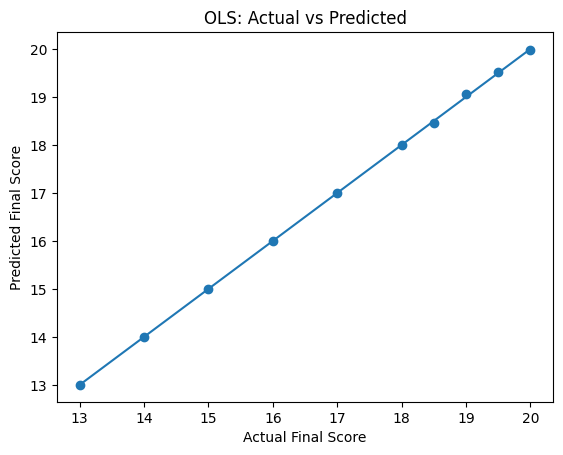

In [15]:
plt.scatter(y, y_pred)
plt.xlabel("Actual Final Score")
plt.ylabel("Predicted Final Score")
plt.title("OLS: Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.show()

Because some features are highly correlated,
the matrix XᵀX may become nearly singular.

This makes the inverse unstable and coefficients unreliable.

This is one of the key limitations of OLS.

Try removing one highly correlated feature
(e.g., previous_gpa) and recompute OLS.

Observe how:
- Coefficients change
- MSE changes